# Prototyping variability_selection

Goal: figure out precisely which criteria we will use to select "valid" stars (Q2, Q1, etc) and 
One change I am considering making: expanding the "Q1" criterion to include stars who may not have any 100% bands, but who are like 90% good in each band. (I'd like to compute variability stats on ONLY their `good` data in these cases, which might require adding some columns to spreadsheet_maker.)

One consideration: backwards compatibility, at least with the 2015 orion paper. At the very very least, let's confirm that we can reproduce those results to some degree.

I'm looking at ["official_star_counter" from wuvsars-orion](https://github.com/tomr-stargazer/wuvars-orion/blob/master/official_star_counter.py).

(We'll also, someday, be interested in splitting off WSERV5-SE and treating it as its own thing, too.)

### First: Can we, like, re-run wuvsars-orion's official star counter?

official star counter lives here:
/Users/tsrice/Documents/Code/wuvars-orion/official_star_counter.py


In [1]:
%run /Users/tsrice/Documents/Code/wuvars-orion/official_star_counter.py

Auto-detected table type: fits
Auto-detected table type: fits
Auto-detected table type: fits
Auto-detected table type: fits
Number of detected sources in the dataset:
40630
Number of stars that meet absolute minimum considerations for valid data:
(i.e., have at least 50 recorded observations in at least one band)
14728
Maximum possible number of variables: 3141
Number of stars automatically classed as variables: 868
Number of stars that have the data quality for auto-classification: 3592
Auto-detected table type: fits

Number of probably-variable stars requiring subjective verification due to imperfect data quality: 2273
Number of new subjectives: 94

Number of STRICT autovariables: 553
Number of STRICT autocandidates: 2348

 Q: Statistically, what fraction of our stars are variables?
 A: 23.55%, drawn from the tightest-controlled sample;
    24.16%, drawn from a looser sample.

Number of possible variables with detected periods: 585
Number of autovariables that are periodic: 354
Numbe

### Stats from "old" official star counter:

- Q0 stars (at least 50 observations in at least one band): 
 - 14728
- Total detected sources:
 - 40630
- Q2 stars:
 - 2348
- Q1 + Q2 stars:
 - 3592

# Question 1: 

Given that we've shifted away from old "summary spreadsheet" code from ~2012 (which used ATpy internally) to new code which uses Pandas internally (for a huge boost in performance, maintainability/clarity, and compatibility with Python 3), can we reproduce the numbers from Table 1 of Rice et al 2015? In other words, **can we verify that the new code produces the same output as the old code**, given the same photometric data and the same definitions for "quality bins"?

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Let's re-implement the above for WSERV5, in my new reduction.

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [5]

for wserv in wserv_ids[::-1]:
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )
    if wserv==5:
        spreadsheet_path = os.path.join(
            spreadsheet_root, 
            "wserv5_v2012",
            f"WSERV{str(wserv)}_fdece_graded_clipped0.8_scrubbed0.1_dusted0.5_summary_spreadsheet.h5")
        print(f"WSERV5: {spreadsheet_path}")
    
    ds = pd.read_hdf(spreadsheet_path, key='table')

    q0 = (
        (ds["count"]["N_J"] >= 50)
        | (ds["count"]["N_H"] >= 50)
        | (ds["count"]["N_K"] >= 50)
    )
    
    print("Total detected sources:", len(ds))
    print("Total sources with at least 50 obs in one band:", len(ds[q0]))



   WSERV5: 

WSERV5: /Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts/wserv5_v2012/WSERV5_fdece_graded_clipped0.8_scrubbed0.1_dusted0.5_summary_spreadsheet.h5
Total detected sources: 40630
Total sources with at least 50 obs in one band: 14728


# Answer to Question 1:

Okay, the good: we are picking up **exactly** the same number of detected sources for WSERV5 as before. (40630)

(Context: this is the version of the spreadsheet which uses the old, '80% graded' data, as an exact copy from 2012.)

The mostly-good: we are picking up very nearly the same number of Q0 sources (15,101 versus the old 14,728). I'm not sure where these 373 newcomers came from, but I'm not particularly invested in finding out.

One might consider it a *problem* that these are not the exact same value. Can we modify the query in some way to get it to be identical? We seem to have *too many* sources in our new criterion.

I think the difference might be that I've computed my N_J in a way that is not treating nulls properly. But - that doesn't really make sense. 

The appropriate way to investigate this further would be to actually *look* at the data for the 373 stars which are excluded by the old code but included in the new code. That would be really valuable, actually. How can we get our hands on those data?

In [4]:
15101 - 14728

373

### Now let's explore Q1 and Q2. (Not considering variability!) How closely can we reproduce those counts?

As a reminder, here are the stats from the old wuvars-orion/official_star_counter that we're working with:

- Q0 stars (at least 50 observations in at least one band): 
 - 14728
- Total detected sources:
 - 40630
- Q2 stars:
 - 2348
- Q1 + Q2 stars:
 - 3592


   WSERV11: 

Total detected sources: 37947
Total Q0 : 24288
Total Q1 : 6683
Total Q2 : 4259

   WSERV5: 

WSERV5: /Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts/wserv5_v2012/WSERV5_fdece_graded_clipped0.8_scrubbed0.1_dusted0.5_summary_spreadsheet.h5
Total detected sources: 40630
Total Q0 : 15101
Total Q1 : 4182
Total Q2 : 2421


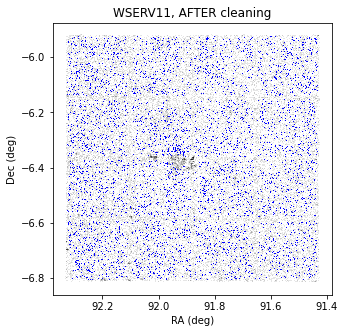

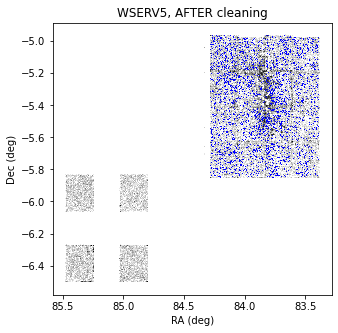

In [14]:
# Let's re-implement the above for WSERV5, in my new reduction.

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [5, 11]

for wserv in wserv_ids[::-1]:
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )
    if wserv==5:
        spreadsheet_path = os.path.join(
            spreadsheet_root, 
            "wserv5_v2012",
            f"WSERV{str(wserv)}_fdece_graded_clipped0.8_scrubbed0.1_dusted0.5_summary_spreadsheet.h5")
        print(f"WSERV5: {spreadsheet_path}")
    
    ds = pd.read_hdf(spreadsheet_path, key='table')

    q0 = (
        (ds["count"]["N_J"] >= 50)
        | (ds["count"]["N_H"] >= 50)
        | (ds["count"]["N_K"] >= 50)
    )
    
    q2_old = (
        (ds["count"]["N_J"] >= 50)
        & (ds["count"]["N_J"] < 135)
        & (ds["count"]["N_H"] >= 50)
        & (ds["count"]["N_H"] < 130)
        & (ds["count"]["N_K"] >= 50)
        & (ds["count"]["N_K"] < 150)
        & (ds['mean']['JAPERMAG3'] > 11)
        & (ds['mean']['HAPERMAG3'] > 11)
        & (ds['mean']['KAPERMAG3'] > 11)
        & (ds['mean']['JAPERMAG3'] < 17)
        & (ds['mean']['HAPERMAG3'] < 16.7)
        & (ds['mean']['KAPERMAG3'] < 16)
        & (ds["count"]["N_J"] == ds["count"]["N_J_good"])
        & (ds["count"]["N_H"] == ds["count"]["N_H_good"])
        & (ds["count"]["N_K"] == ds["count"]["N_K_good"])
        & (ds["median"]["PSTAR"] > 0.75)
    )    
    
    q1_old = (
        (
            (ds["count"]["N_J"] >= 50)
            & (ds["count"]["N_J"] < 135)
            & (ds["mean"]["JAPERMAG3"] > 11)
            & (ds["mean"]["JAPERMAG3"] < 17)
            & (ds["count"]["N_J"] == ds["count"]["N_J_good"])
        )
        | (
            (ds["count"]["N_H"] >= 50)
            & (ds["count"]["N_H"] < 130)
            & (ds["mean"]["HAPERMAG3"] > 11)
            & (ds["mean"]["HAPERMAG3"] < 16.7)
            & (ds["count"]["N_H"] == ds["count"]["N_H_good"])
        )
        | (
            (ds["count"]["N_K"] >= 50)
            & (ds["count"]["N_K"] < 150)
            & (ds["mean"]["KAPERMAG3"] > 11)
            & (ds["mean"]["KAPERMAG3"] < 16)
            & (ds["count"]["N_K"] == ds["count"]["N_K_good"])
        )
        & (ds["median"]["PSTAR"] > 0.75)
    )
    
    print("Total detected sources:", len(ds))
    print("Total Q0 :", len(ds[q0]))
    print("Total Q1 :", len(ds[q1_old]))
    print("Total Q2 :", len(ds[q2_old]))

    fig = plt.figure(figsize=(5,5))
    
    plt.plot(np.degrees(ds['median']['RA']), np.degrees(ds['median']['DEC']), 'k,', alpha=0.1)
    plt.plot(np.degrees(ds['median']['RA'][q2_old]), np.degrees(ds['median']['DEC'][q2_old]), 'b,')
    plt.gca().invert_xaxis()
    plt.title(f"WSERV{str(wserv)}, AFTER cleaning")
    plt.xlabel("RA (deg)")
    plt.ylabel("Dec (deg)")

### Okay, now we have:
old: 2348
new: 2421

(that's the total number of Q2 stars)

old: 3592
new: 4182
(that's total Q1 stars)

looks p. good, tbh.

It is curious that the numbers don't exactly overlap, but I'm not really gonna stress about it. I think we are onto something.

I will say: I am going to ditch the lower limit on magnitude (ie the faint limit). I think the error bars, when representative (and post-cleaning), speak for themselves, and if there's a star down in those magnitude depths that clears the statistical threshold of "variable" and "good data", we should take it regardless of how faint it is. (This is vital, of course, for brown dwarfs!)

# Can we empirically figure out where the saturation limit is?

I'm thinking a plot of J, H, K mag against N_severe. With no filtering.

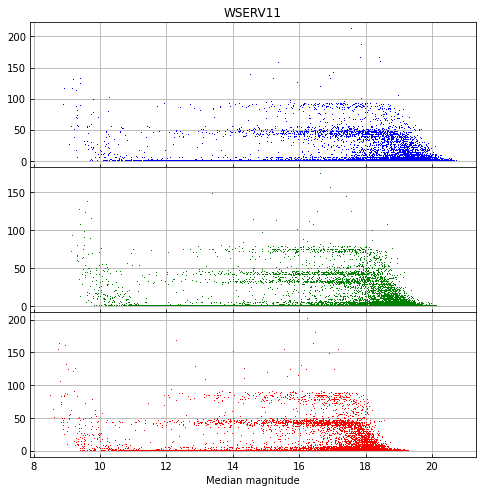

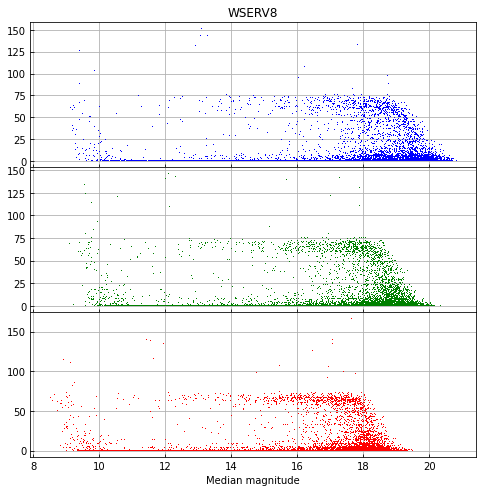

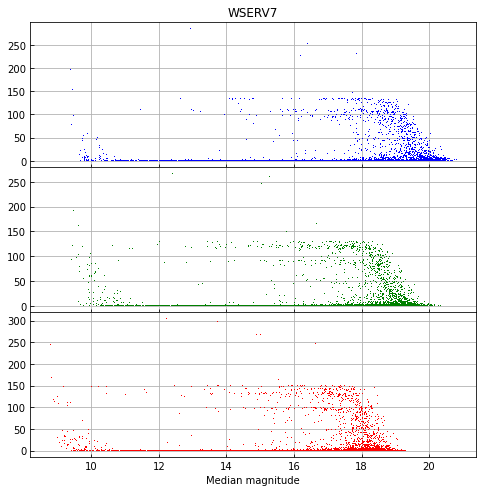

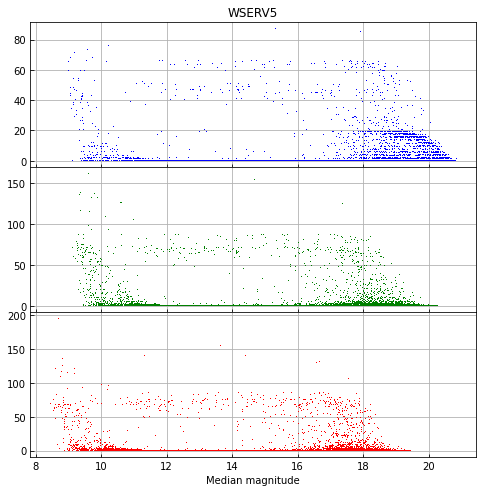

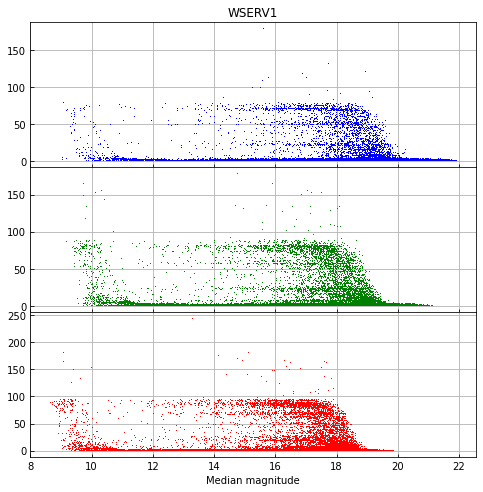

In [16]:
wserv_ids = [1, 5, 7, 8, 11]
# wserv_ids = [5]

output_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"

for wserv in wserv_ids[::-1]:

    output_path = os.path.join(
        output_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )
#     if wserv==5:
#         output_path = os.path.join(
#             output_root, 
#             "wserv5_v2012",
#             f"WSERV{str(wserv)}_fdece_graded_clipped0.8_scrubbed0.1_dusted0.5_summary_spreadsheet.h5")

    ds = pd.read_hdf(output_path, key='table')
    
    fig, axes = plt.subplots(3, sharex=True, figsize=(8,8))
    
    axes[0].plot(ds['median']['JAPERMAG3'], ds['count']['N_J_severe'], 'b,')
    axes[1].plot(ds['median']['HAPERMAG3'], ds['count']['N_H_severe'], 'g,')
    axes[2].plot(ds['median']['KAPERMAG3'], ds['count']['N_K_severe'], 'r,')

    for ax, band in zip(axes, ["J", "H", "K"]):
#         ax.axhline(0.02, color='k', alpha=0.5, lw=0.5)
#         ax.set_ylim(0, 0.195)

#         ax.set_ylabel(f"{band} standard deviation")
        ax.tick_params(direction='in')
        ax.grid(True)
        
    axes[2].set_xlabel("Median magnitude")
    axes[0].set_title(f"WSERV{wserv}")
    plt.subplots_adjust(hspace=0)
    

# Saturation post-script
I feel that any band brighter than 11 disqualifies as Q2. That feels safe.

In [17]:
#     q2 = (
#         (ds["count"]["N_J"] >= 50)
#         & (ds["count"]["N_J"] < 150)
#         & (ds["count"]["N_H"] >= 50)
#         & (ds["count"]["N_H"] < 150)
#         & (ds["count"]["N_K"] >= 50)
#         & (ds["count"]["N_K"] < 150)
#         & (ds["mean"]["JAPERMAG3"] > 11)
#         & (ds["mean"]["HAPERMAG3"] > 11)
#         & (ds["mean"]["KAPERMAG3"] > 11)
#         & (ds["count"]["N_J"] == ds["count"]["N_J_good"])
#         & (ds["count"]["N_H"] == ds["count"]["N_H_good"])
#         & (ds["count"]["N_K"] == ds["count"]["N_K_good"])
#         & (ds["median"]["PSTAR"] > 0.75)
#     )

In [20]:
# Let's re-implement the above for WSERV5, in my new reduction.

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]

for wserv in wserv_ids[::-1]:
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )
    if wserv==5:
        spreadsheet_path = os.path.join(
            spreadsheet_root, 
            "wserv5_v2012",
            f"WSERV{str(wserv)}_fdece_graded_clipped0.8_scrubbed0.1_dusted0.5_summary_spreadsheet.h5")
        print(f"WSERV5: {spreadsheet_path}")
    
    ds = pd.read_hdf(spreadsheet_path, key='table')

    q0 = (
        (ds["count"]["N_J"] >= 50)
        | (ds["count"]["N_H"] >= 50)
        | (ds["count"]["N_K"] >= 50)
    )
    
    q2_old = (
        (ds["count"]["N_J"] >= 50)
        & (ds["count"]["N_J"] < 135)
        & (ds["count"]["N_H"] >= 50)
        & (ds["count"]["N_H"] < 130)
        & (ds["count"]["N_K"] >= 50)
        & (ds["count"]["N_K"] < 150)
        & (ds['mean']['JAPERMAG3'] > 11)
        & (ds['mean']['HAPERMAG3'] > 11)
        & (ds['mean']['KAPERMAG3'] > 11)
        & (ds['mean']['JAPERMAG3'] < 17)
        & (ds['mean']['HAPERMAG3'] < 16.7)
        & (ds['mean']['KAPERMAG3'] < 16)
        & (ds["count"]["N_J"] == ds["count"]["N_J_good"])
        & (ds["count"]["N_H"] == ds["count"]["N_H_good"])
        & (ds["count"]["N_K"] == ds["count"]["N_K_good"])
        & (ds["median"]["PSTAR"] > 0.75)
    )    
    q2 = (
        (ds["count"]["N_J"] >= 50)
        & (ds["count"]["N_J"] < 150)
        & (ds["count"]["N_H"] >= 50)
        & (ds["count"]["N_H"] < 150)
        & (ds["count"]["N_K"] >= 50)
        & (ds["count"]["N_K"] < 150)
        & (ds["mean"]["JAPERMAG3"] > 11)
        & (ds["mean"]["HAPERMAG3"] > 11)
        & (ds["mean"]["KAPERMAG3"] > 11)
        & (ds["count"]["N_J"] == ds["count"]["N_J_good"])
        & (ds["count"]["N_H"] == ds["count"]["N_H_good"])
        & (ds["count"]["N_K"] == ds["count"]["N_K_good"])
        & (ds["median"]["PSTAR"] > 0.75)
    )    
    
    q1_old = (
        (
            (ds["count"]["N_J"] >= 50)
            & (ds["count"]["N_J"] < 135)
            & (ds["mean"]["JAPERMAG3"] > 11)
            & (ds["mean"]["JAPERMAG3"] < 17)
            & (ds["count"]["N_J"] == ds["count"]["N_J_good"])
        )
        | (
            (ds["count"]["N_H"] >= 50)
            & (ds["count"]["N_H"] < 130)
            & (ds["mean"]["HAPERMAG3"] > 11)
            & (ds["mean"]["HAPERMAG3"] < 16.7)
            & (ds["count"]["N_H"] == ds["count"]["N_H_good"])
        )
        | (
            (ds["count"]["N_K"] >= 50)
            & (ds["count"]["N_K"] < 150)
            & (ds["mean"]["KAPERMAG3"] > 11)
            & (ds["mean"]["KAPERMAG3"] < 16)
            & (ds["count"]["N_K"] == ds["count"]["N_K_good"])
        )
        & (ds["median"]["PSTAR"] > 0.75)
    )
    q1 = (
        (
            (ds["count"]["N_J"] >= 50)
            & (ds["count"]["N_J"] < 150)
            & (ds["mean"]["JAPERMAG3"] > 11)
            & (ds["count"]["N_J"] == ds["count"]["N_J_good"])
        )
        | (
            (ds["count"]["N_H"] >= 50)
            & (ds["count"]["N_H"] < 150)
            & (ds["mean"]["HAPERMAG3"] > 11)
            & (ds["count"]["N_H"] == ds["count"]["N_H_good"])
        )
        | (
            (ds["count"]["N_K"] >= 50)
            & (ds["count"]["N_K"] < 150)
            & (ds["mean"]["KAPERMAG3"] > 11)
            & (ds["count"]["N_K"] == ds["count"]["N_K_good"])
        )
        & (ds["median"]["PSTAR"] > 0.75)
    )    
    
    print("Total detected sources:", len(ds))
    print("Total Q0 :", len(ds[q0]))
    print("Total Q1 OLD:", len(ds[q1_old]))
    print("Total Q1 NEW:", len(ds[q1]))
    print("Total Q2 OLD:", len(ds[q2_old]))
    print("Total Q2 NEW:", len(ds[q2]))


   WSERV11: 

Total detected sources: 37947
Total Q0 : 24288
Total Q1 OLD: 6683
Total Q1 NEW: 19936
Total Q2 OLD: 4259
Total Q2 NEW: 13520

   WSERV8: 

Total detected sources: 27769
Total Q0 : 16392
Total Q1 OLD: 4118
Total Q1 NEW: 12674
Total Q2 OLD: 2636
Total Q2 NEW: 8113

   WSERV7: 

Total detected sources: 21885
Total Q0 : 14091
Total Q1 OLD: 3261
Total Q1 NEW: 11137
Total Q2 OLD: 2076
Total Q2 NEW: 7043

   WSERV5: 

WSERV5: /Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts/wserv5_v2012/WSERV5_fdece_graded_clipped0.8_scrubbed0.1_dusted0.5_summary_spreadsheet.h5
Total detected sources: 40630
Total Q0 : 15101
Total Q1 OLD: 4182
Total Q1 NEW: 6079
Total Q2 OLD: 2421
Total Q2 NEW: 3385

   WSERV1: 

Total detected sources: 227368
Total Q0 : 123985
Total Q1 OLD: 22960
Total Q1 NEW: 105574
Total Q2 OLD: 10793
Total Q2 NEW: 53621



   WSERV11: 



/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in l


   WSERV8: 



/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in l


   WSERV7: 



/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in l


   WSERV5: 

WSERV5: /Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts/wserv5_v2012/WSERV5_fdece_graded_clipped0.8_scrubbed0.1_dusted0.5_summary_spreadsheet.h5


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in l


   WSERV1: 



/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in l

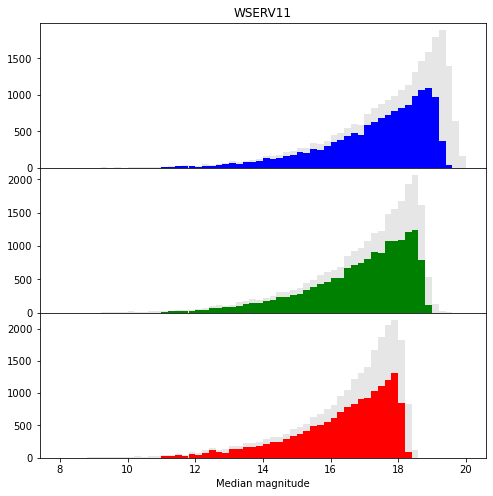

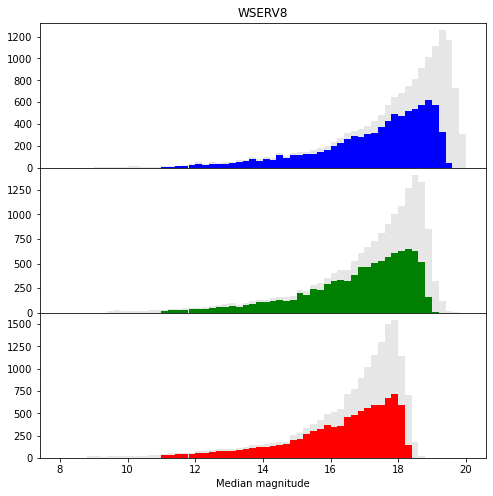

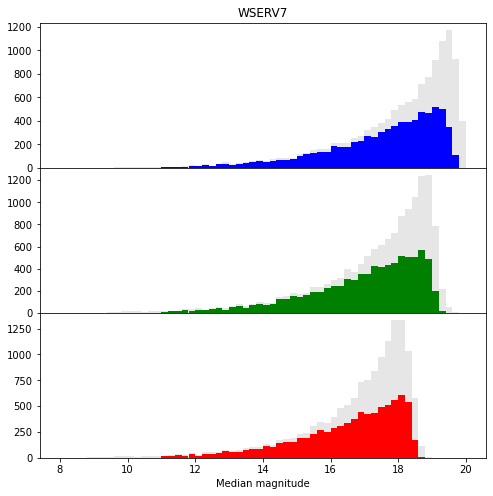

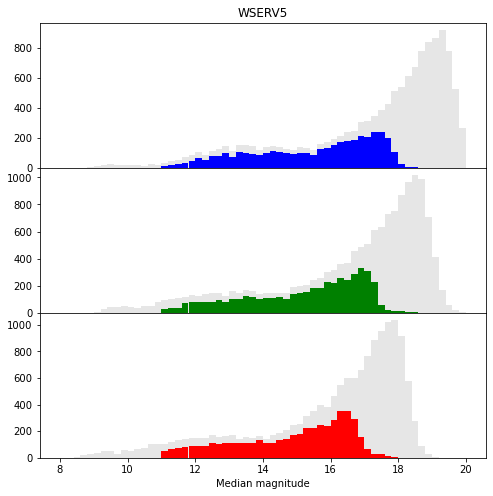

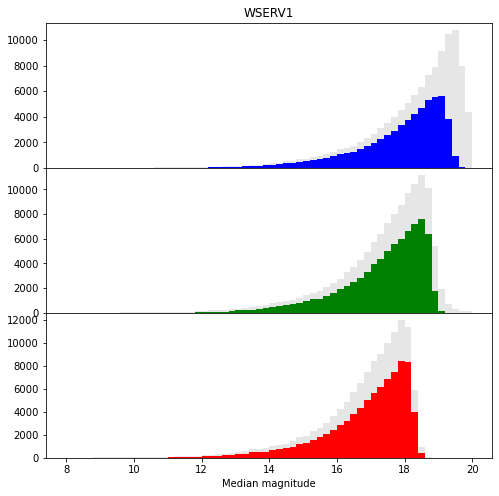

In [25]:
# Let's re-implement the above for WSERV5, in my new reduction.

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]

for wserv in wserv_ids[::-1]:
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )
    if wserv==5:
        spreadsheet_path = os.path.join(
            spreadsheet_root, 
            "wserv5_v2012",
            f"WSERV{str(wserv)}_fdece_graded_clipped0.8_scrubbed0.1_dusted0.5_summary_spreadsheet.h5")
        print(f"WSERV5: {spreadsheet_path}")
    
    ds = pd.read_hdf(spreadsheet_path, key='table')

    q0 = (
        (ds["count"]["N_J"] >= 50)
        | (ds["count"]["N_H"] >= 50)
        | (ds["count"]["N_K"] >= 50)
    )

    q1_j = (
        (
            (ds["count"]["N_J"] >= 50)
            & (ds["count"]["N_J"] < 150)
            & (ds["mean"]["JAPERMAG3"] > 11)
            & (ds["count"]["N_J"] == ds["count"]["N_J_good"])
        )
        & (ds["median"]["PSTAR"] > 0.75)
    )    
    q1_h = (
        (
            (ds["count"]["N_H"] >= 50)
            & (ds["count"]["N_H"] < 150)
            & (ds["mean"]["HAPERMAG3"] > 11)
            & (ds["count"]["N_H"] == ds["count"]["N_H_good"])
        )
        & (ds["median"]["PSTAR"] > 0.75)
    )    
    q1_k = (
        (
            (ds["count"]["N_K"] >= 50)
            & (ds["count"]["N_K"] < 150)
            & (ds["mean"]["KAPERMAG3"] > 11)
            & (ds["count"]["N_K"] == ds["count"]["N_K_good"])
        )
        & (ds["median"]["PSTAR"] > 0.75)
    )    
    

    fig, axes = plt.subplots(3, sharex=True, figsize=(8,8))
    
    axes[0].hist(ds['median']['JAPERMAG3'][q0], range=[8,20], bins=(20-8)*5, color='0.9', histtype='stepfilled')
    axes[1].hist(ds['median']['HAPERMAG3'][q0], range=[8,20], bins=(20-8)*5, color='0.9', histtype='stepfilled')
    axes[2].hist(ds['median']['KAPERMAG3'][q0], range=[8,20], bins=(20-8)*5, color='0.9', histtype='stepfilled')
    
    axes[0].hist(ds['median']['JAPERMAG3'][q1_j], range=[8,20], bins=(20-8)*5, color='b')
    axes[1].hist(ds['median']['HAPERMAG3'][q1_h], range=[8,20], bins=(20-8)*5, color='g')
    axes[2].hist(ds['median']['KAPERMAG3'][q1_k], range=[8,20], bins=(20-8)*5, color='r')
    
    axes[2].set_xlabel("Median magnitude")
    axes[0].set_title(f"WSERV{wserv}")
    plt.subplots_adjust(hspace=0)



In [21]:
# This is something written years ago

def f_flux_hist_per_band():
    """
    Plots distribution of detected sources over magnitude for J, H, K.

    """

    fig = plt.figure()

    j_minimum = minimum.where((minimum.N_j > 50))
    h_minimum = minimum.where((minimum.N_h > 80))
    k_minimum = minimum.where((minimum.N_k > 80))

    j_strict = autocan_true.where( 
        (autocan_true.N_j >= 50) & (autocan_true.N_j <= 125) &    # J band criteria
        (autocan_true.j_mean > 11) & (autocan_true.j_mean < 17) & 
        (autocan_true.N_j_info == 0) 
        )

    h_strict = autocan_true.where( 
        (autocan_true.N_h >= 50) & (autocan_true.N_h <= 125) &    # H band criteria
        (autocan_true.h_mean > 11) & (autocan_true.h_mean < 16) & 
        (autocan_true.N_h_info == 0) 
        )

    k_strict = autocan_true.where( 
        (autocan_true.N_k >= 50) & (autocan_true.N_k <= 125) &    # K band criteria
        (autocan_true.k_mean > 11) & (autocan_true.k_mean < 16) & 
        (autocan_true.N_k_info == 0) 
        )

    s1 = plt.subplot(3,1,1)
    s2 = plt.subplot(3,1,2, sharex=s1)
    s3 = plt.subplot(3,1,3, sharex=s1)
    
    minimum_color='0.9'
    s1.hist(j_minimum.j_meanr, range=[8,20], bins=(20-8)*5, color=minimum_color, histtype='stepfilled')
    s2.hist(h_minimum.h_meanr, range=[8,20], bins=(20-8)*5, color=minimum_color, histtype='stepfilled')
    s3.hist(k_minimum.k_meanr, range=[8,20], bins=(20-8)*5, color=minimum_color, histtype='stepfilled')

    s1.hist(j_strict.j_meanr, range=[8,20], bins=(20-8)*5, color='b')
    s2.hist(h_strict.h_meanr, range=[8,20], bins=(20-8)*5, color='g')
    s3.hist(k_strict.k_meanr, range=[8,20], bins=(20-8)*5, color='r')

    # plt.xlim(10.5, 17.5)

    s3.set_xlabel("Magnitude")
    s3.set_ylabel("Number of sources")
    # for s in [s1,s2,s3]:
    #     s.set_ylim(0,0.1)
    #     s.set_yticks([0, 0.05, 0.1])

    s1.text(0.2, 0.6, "$J$", fontsize=24, color='b', transform=s1.transAxes)
    s2.text(0.2, 0.6, "$H$", fontsize=24, color='g', transform=s2.transAxes)
    s3.text(0.2, 0.6, "$K$", fontsize=24, color='r', transform=s3.transAxes)        

    plt.show()

    return fig